# M6 Chemical Switches, Cell Cycle and Circadian Clock

F. Fages

April 2020


# Part I: MAPK signalling switch program
* basic component of Mitogen Activated Protein Kinase (MAPK) signaling networks in cells
* here just one level of double phosphorylation (same kinase MAPKK for the phosporylations, same phosphatase MKP for the dephosphorylations)
* **input MAPKK**
* **output MPP**

### Model 26 of BioModels
Markevich, N.I., Hoek, J.B., Kholodenko, B.N., 2004. Signaling switches and bistability arising from multisite phosphorylation in protein kinase cascades. Journal of Cell Biology 164, 353–359.

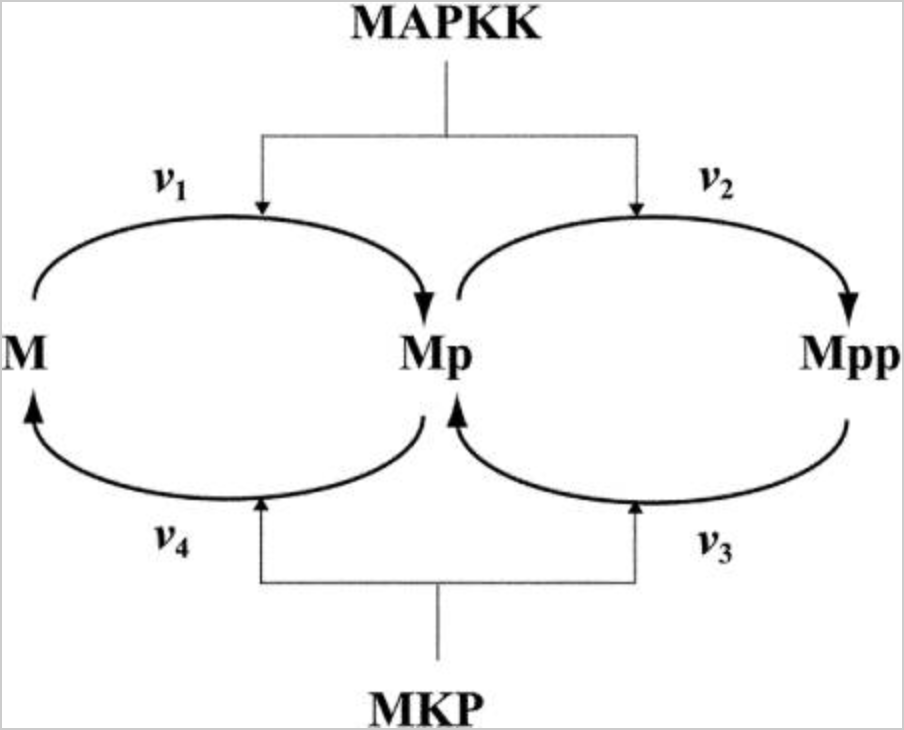

In [1]:
load('library:biomodels/BIOMD0000000026.xml').
list_model.

k1*M*MAPKK for M+MAPKK=>M_MAPKK.
k_1*M_MAPKK for M_MAPKK=>M+MAPKK.
k2*M_MAPKK for M_MAPKK=>Mp+MAPKK.
k3*Mp*MAPKK for Mp+MAPKK=>Mp_MAPKK.
k_3*Mp_MAPKK for Mp_MAPKK=>Mp+MAPKK.
k4*Mp_MAPKK for Mp_MAPKK=>Mpp+MAPKK.
h1*Mpp*MKP3 for Mpp+MKP3=>Mpp_MKP3.
h_1*Mpp_MKP3 for Mpp_MKP3=>Mpp+MKP3.
h2*Mpp_MKP3 for Mpp_MKP3=>Mp_MKP3_dep.
h3*Mp_MKP3_dep/uVol for Mp_MKP3_dep=>Mp+MKP3.
h_3*Mp*MKP3/uVol for Mp+MKP3=>Mp_MKP3_dep.
h4*Mp*MKP3 for Mp+MKP3=>Mp_MKP3.
h_4*Mp_MKP3 for Mp_MKP3=>Mp+MKP3.
h5*Mp_MKP3 for Mp_MKP3=>M_MKP3.
h6*M_MKP3 for M_MKP3=>M+MKP3.
h_6*M*MKP3 for M+MKP3=>M_MKP3.
present(M,500.0).
present(Mp,0.0).
present(Mpp,0.0).
present(MAPKK,50.0).
present(MKP3,100.0).
present(M_MAPKK,0.0).
present(Mp_MAPKK,0.0).
present(Mpp_MKP3,0.0).
present(Mp_MKP3_dep,0.0).
present(Mp_MKP3,0.0).
present(M_MKP3,0.0).
parameter(
  uVol = 1.0,
  k1 = 0.02,
  k_1 = 1.0,
  k2 = 0.01,
  k3 = 0.032,
  k_3 = 1.0,
  k4 = 15.0,
  h1 = 0.045,
  h_1 = 1.0,
  h2 = 0.092,
  h3 = 1.0,
  h_3 = 0.01,
  h4 = 0.01,
  h_4 = 1.0,

#### Reaction graph analysis: conservation laws for M, MAPKK and MKP
* computation based on the *reaction graph* structure
 * Petri net place-invariants as structural conservation laws for the ODE semantics
 * constraint logic programming algorithm [(Soliman12amb)](https://lifeware.inria.fr/wiki/Main/Publications#Soliman12amb)

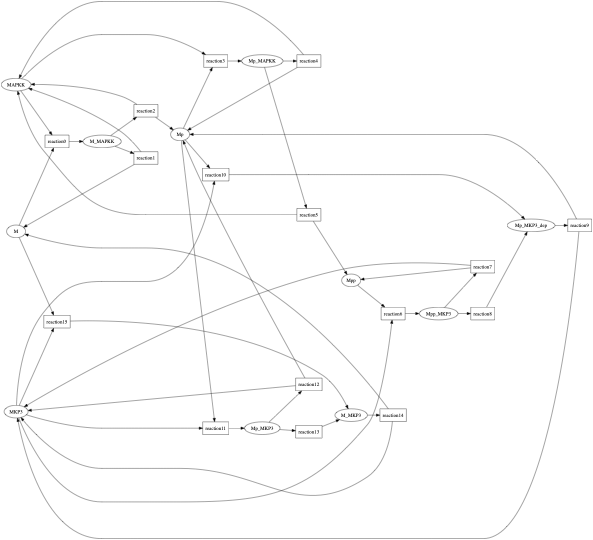

In [2]:
draw_reactions.

In [3]:
search_conservations.

M+M_MAPKK+M_MKP3+Mp+Mp_MAPKK+Mp_MKP3+Mp_MKP3_dep+Mpp+Mpp_MKP3
MAPKK+M_MAPKK+Mp_MAPKK
MKP3+M_MKP3+Mp_MKP3+Mp_MKP3_dep+Mpp_MKP3
3 complex invariant(s)


#### Influence graph analysis: multistationarity analysis
* computation based on the *influence graph*
 * existence of positive circuit as necessary condition for multistationarity [(Soliman13bmb)](https://lifeware.inria.fr/wiki/Main/Publications#Soliman13bmb)
 * graph rewriting algorithm [(BFS18jtb)](https://lifeware.inria.fr/wiki/Main/Publications#BFS18jtb)
 

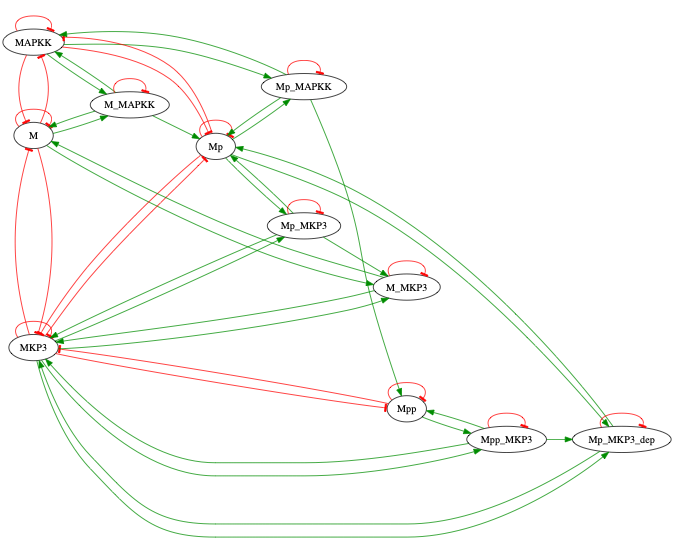

In [4]:
draw_influences.

#### Stochastic dynamics
* very regular because of the high numbers of molecules
* will be well aproximated by the differential semantics

In [5]:
numerical_simulation(method:ssa, stochastic_conversion:10). plot.

#### Differential dynamics

In [6]:
list_ode.

In [7]:
numerical_simulation. plot.

## FO-LTL(Rlin) temporal logic constraints
* the numerical integrator has an adaptive step size
* however at the end of this time horizon the step size is still small meaning that some molecular species still significantly change
* in this model, Mpp has not reached its maximum over the time horizon

In [8]:
validity_domain(F(Mpp=v /\ Time=t)). % all values

v=0/\t=0\/v=0/\t=3.0e-6\/v=0/\t=3.8e-5\/v=0/\t=0.000213\/v=0/\t=0.001588\/v=1.0e-6/\t=0.023463\/v=0.001005/\t=0.223463\/v=0.002752/\t=0.423463\/v=0.004746/\t=0.623463\/v=0.007352/\t=0.823463\/v=0.010645/\t=1.02346\/v=0.014644/\t=1.22346\/v=0.019382/\t=1.42346\/v=0.024908/\t=1.62346\/v=0.031275/\t=1.82346\/v=0.038527/\t=2.02346\/v=0.046705/\t=2.22346\/v=0.05584/\t=2.42346\/v=0.065958/\t=2.62346\/v=0.077072/\t=2.82346\/v=0.089192/\t=3.02346\/v=0.102318/\t=3.22346\/v=0.116443/\t=3.42346\/v=0.131553/\t=3.62346\/v=0.147628/\t=3.82346\/v=0.164645/\t=4.02346\/v=0.182574/\t=4.22346\/v=0.201382/\t=4.42346\/v=0.221034/\t=4.62346\/v=0.24149/\t=4.82346\/v=0.262712/\t=5.02346\/v=0.284657/\t=5.22346\/v=0.307285/\t=5.42346\/v=0.330555/\t=5.62346\/v=0.354425/\t=5.82346\/v=0.378857/\t=6.02346\/v=0.40381/\t=6.22346\/v=0.429248/\t=6.42346\/v=0.455135/\t=6.62346\/v=0.481436/\t=6.82346\/v=0.508121/\t=7.02346\/v=0.535157/\t=7.22346\/v=0.562518/\t=7.42346\/v=0.590175/\t=7.62346\/v=0.618106/\t=7.82346\/v=0.64

In [9]:
expand_ltl(F(G(Mpp=v))). % last value
validity_domain(F(G(Mpp=v))).

F(G(Mpp=v))
v=2.45059


In [10]:
expand_ltl(maximum(Mpp,v)). 
validity_domain(maximum(Mpp,v)).

G(Mpp<=v)/\F(Mpp>=v)
v=2.45059


In [11]:
expand_ltl(increase(Mpp, v)). % increasing or equal values 
validity_domain(F(increase(Mpp, v))).

Mpp<=v/\X(Mpp>=v)
v>=0/\v<=2.45059


In [12]:
option(show: Mpp).
numerical_simulation. plot.

# Question 1) Give an FO-LTL(Rlin) formula to compute the last 3 time steps and values of Mpp
* use that formula to show that Mpp has not stabilized at time 20
* but does stabilizes at a time scale of 1e4

### Dose-response diagrams

* Dose response diagrams are obtained in Biocham by simulation by slowly varying the input and drawing the output value after *sufficient time for stabilization*

* The steady state is not computed symbolically, but assumed to be reached over that time horizon for all values of the input.



#### Switch-like response
* S-shape response of the output Mpp as a function of the input concentration MAPKK
* (a stiffer response is obtained at the third level of the full three level MAPK cascade network)
* switch-like response, i.e. **analog-digital converter**


In [13]:
option(time:1e4).
dose_response(MAPKK, 0, 100, time:1e4, show:Mpp).

### Bistability: memory effect
* bistability is shown by a bifurcation diagram obtained here by first slowly increasing the input and then decreasing it
* the *hysteresis* shows a memory effect which corresponds to the existence of two stable states in the rate equation

In [14]:
bifurcations(MAPKK, 0, 100, time:1e4, show:Mpp).

# Question 2) does multistability arise on the first phosphorylation Mp ?

*write your answer here*

*...*


# Question 3) does multistability arise in absence of the second phosphorylation reaction ? 
You can delete a reaction just by setting its kinetic parameters to 0

# Part II: Cell Division Cycle Program


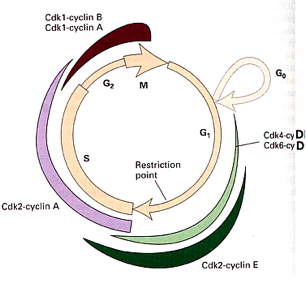


### Model of the G2-M transition (similarly G1-S transition)
Adapted from:

Dynamics of the Cell Cycle: Checkpoints, Sizers, and Timers, Zhilin Qu, W. Robb MacLellan, James N. Weiss, 2003, Biophysical Journal, 85, 3600-3611. PubMed ID: 14645053

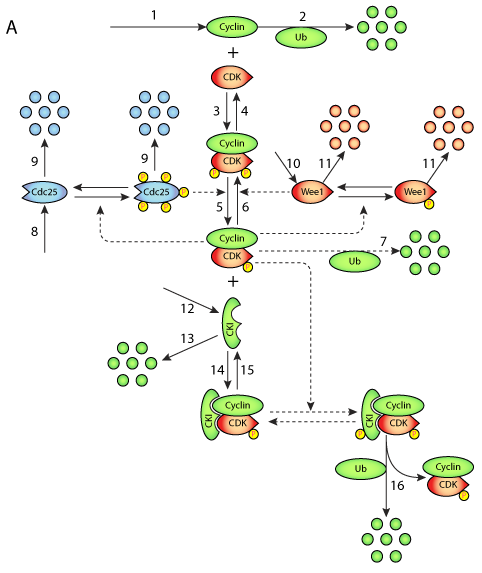

* MPF mitosis promoting factor: Cyclin-Cdk-p is the active form

* positive feedback facilitated by Cdc25 and Wee1 causes bistability in cyclin-dependent kinase activity

* negative feedback facilitated by SKP2 or anaphase-promoting-complex turns this bistable behavior into limit cycle behavior

In [15]:
% load(library:examples/cell_cycle/Qu_et_al_2003.bc).
load(cell_cycle.bc).

In [16]:
list_model.

ksmpf for _=>preMPF.
kdmpfp*preMPF for preMPF=>_.
kdmpfp*MPF for MPF=>_.
kdmpf*APC*MPF for MPF+APC=>APC.
kdmpf*APC*preMPF for preMPF+APC=>APC.
kampf*C25P*preMPF for preMPF+C25P=>MPF+C25P.
kimpf*Wee1*MPF for MPF+Wee1=>preMPF+Wee1.
Viw*Wee1p/(Kiw+Wee1p) for Wee1p=>Wee1.
Vapw*Wee1/(Kaw+Wee1) for Wee1+MPF=>Wee1p+MPF.
Vaw*MPF*Wee1/(Kaw+Wee1) for Wee1+MPF=>Wee1p+MPF.
ksweemp for _=>mWee1.
kdweem*mWee1 for mWee1=>_.
kswee*mWee1 for mWee1=>Wee1+mWee1.
kdwee*Wee1 for Wee1=>_.
kdwee*Wee1p for Wee1p=>_.
Vic*C25P/(Kic25+C25P) for C25P=>C25.
Vapc*C25/(Kac25+C25) for C25+MPF=>C25P+MPF.
Vac*MPF*C25/(Kac25+C25) for C25+MPF=>C25P+MPF.
ks25 for _=>C25.
kd25*C25 for C25=>_.
kd25*C25P for C25P=>_.
ksiep for _=>IE.
ksie*MPF for MPF=>IE+MPF.
kdie*IE for IE=>_.
kaapcp*APCi/(Kapc+APCi) for APCi+IE=>APC+IE.
kaapc*IE*APCi/(Kapc+APCi) for APCi+IE=>APC+IE.
kiapc*APC/(Kapc+APC) for APC=>APCi.
present(preMPF,0.279939269).
present(MPF,0.747404087).
present(C25,0.629659946).
present(C25P,0.370340054).
present(Wee1,0.

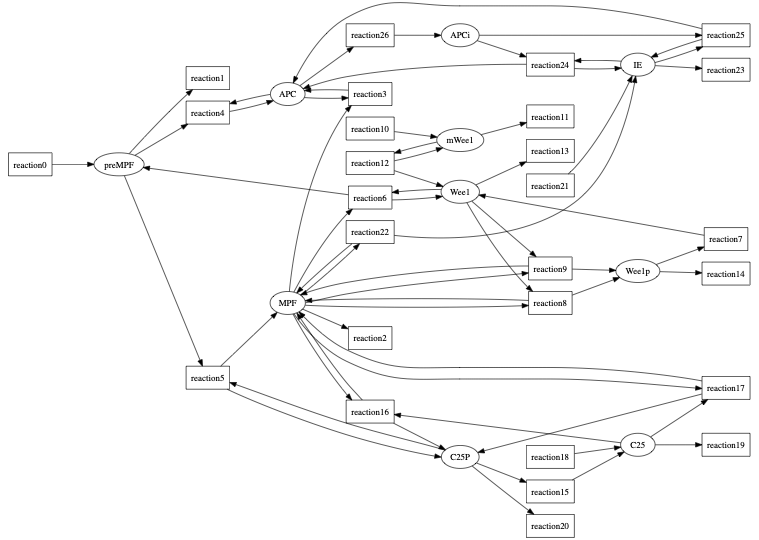

In [17]:
option(draw_first:sources, left_to_right: yes).
draw_reactions.

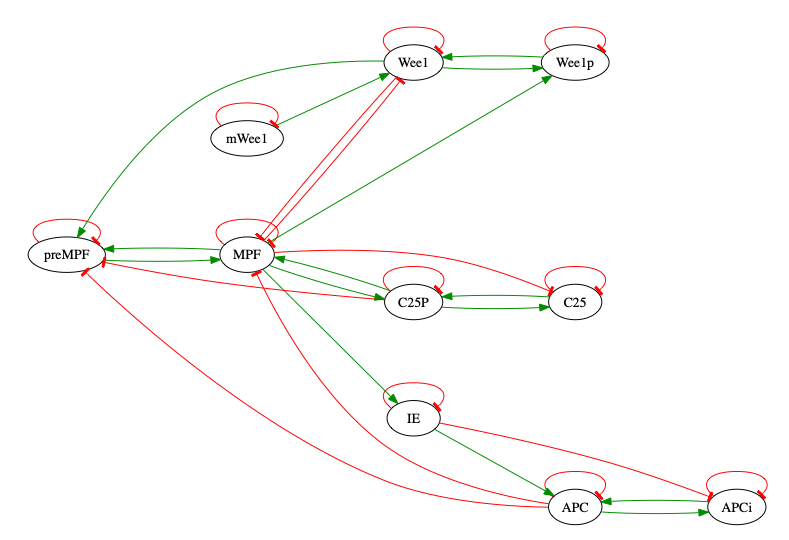

In [18]:
draw_influences.

In [19]:
list_ode.

In [ ]:
option(time: 72). % simulation with a time horizon of 3 days
numerical_simulation. plot.

In [21]:
%plot(show:{(CycB-CDK~{p1})}). % mitosis
option(show:MPF).
plot.

In [22]:
expand_ltl(maximum(MPF,V)).
validity_domain(maximum(MPF,V)).

G(MPF<=V)/\F(MPF>=V)
V=0.753176


In [23]:
expand_ltl(amplitude(MPF,a)).
validity_domain(amplitude(MPF,a)).

exists(Minimum,exists(Maximum,G(MPF<=Maximum)/\F(MPF>=Maximum)/\(G(MPF>=Minimum)/\F(MPF<=Minimum))/\a=Maximum-Minimum))
a=0.75174


In [24]:
expand_ltl(peak(MPF,C)).
validity_domain(F(peak(MPF,C))).

MPF<C/\X(MPF>=C/\X(MPF<=C))
C<=0.753176/\C>0.681637


In [25]:
expand_ltl(peak(MPF,C,T)).
validity_domain(F(peak(MPF,C,T))).

MPF<C/\X(MPF>=C/\X(MPF<=C)/\Time=T)
C<=0.749731/\C>0.747371/\T=0.380634\/C<=0.751637/\C>0.698911/\T=24.8606\/C<=0.753176/\C>0.681637/\T=48.6206


In [26]:
expand_ltl(successive_peaks(MPF,C1,T1,C2,T2)).
validity_domain(successive_peaks(MPF,C1,T1,C2,T2)).

F(U(exists(Concentration,MPF>=Concentration/\X(MPF<=Concentration)),U(exists(Concentration,MPF<=Concentration/\X(MPF>=Concentration)),MPF<C1/\X(MPF>=C1/\X(MPF<=C1)/\Time=T1)/\X(U(exists(Concentration,MPF>=Concentration/\X(MPF<=Concentration)),U(exists(Concentration,MPF<=Concentration/\X(MPF>=Concentration)),MPF<C2/\X(MPF>=C2/\X(MPF<=C2)/\Time=T2)))))))
C2>0.698911/\C2<=0.751637/\C1<=0.749731/\C1>0.747371/\T1=0.380634/\T2=24.8606\/C2>0.681637/\C2<=0.753176/\C1<=0.751637/\C1>0.698911/\T1=24.8606/\T2=48.6206


#### Warning: the period constraint just looks for one succession of two peaks

In [27]:
expand_ltl(period(MPF,p)).
validity_domain(period(MPF, p)).

exists(T1,exists(T2,exists(C1,exists(C2,F(U(exists(Concentration,MPF>=Concentration/\X(MPF<=Concentration)),U(exists(Concentration,MPF<=Concentration/\X(MPF>=Concentration)),MPF<C1/\X(MPF>=C1/\X(MPF<=C1)/\Time=T1)/\X(U(exists(Concentration,MPF>=Concentration/\X(MPF<=Concentration)),U(exists(Concentration,MPF<=Concentration/\X(MPF>=Concentration)),MPF<C2/\X(MPF>=C2/\X(MPF<=C2)/\Time=T2)))))))/\p=T2-T1))))
p=24.479966\/p=23.76


# Question 4) Determine the most sensitive parameters among the degradation parameters that affect the period
* you can use command sensitivity(FOLTL_constraint, list_of_parameters, list_of_objectives)

### interpret the result

# Question 5) Determine the range of periods that can be obtained by changing the most sensitive parameter
* Warning: in life not everything is monotone
* Verify by simulation the parameter values that satisfy satisfying the period constraints 

# Part III: Circadian Clock

* each cell of our body contains a genetic oscillator that beats at 24 hours
* that circadian clock is entrained by the brain (suprachiasmatic hypothalamus) 
* through the secretion of ```melatonine``` and ```cortisol``` hormones 

<img src="circadian.png" width="400">

# Question 6) Design a CRN to implement an oscillator with a free period of 24h
You can use Biocham commands
* to synthesize a CRN for the cosine function plus 1
* (manually simplify the generated CRN)
* determine the most sensitive parameters for the period
* parametrize the CRN such that it beats at 24 units of time

# Question 7) Determine the most sensitive parameter that affects the period 

# Part IV: Control of the Cell Cyle by the Circadian Clock
There is evidence that
* one circadian clock protein is a repressor of Wee1 synthesis
* the effect is that mitosis can only occur when that circadian clock protein is low

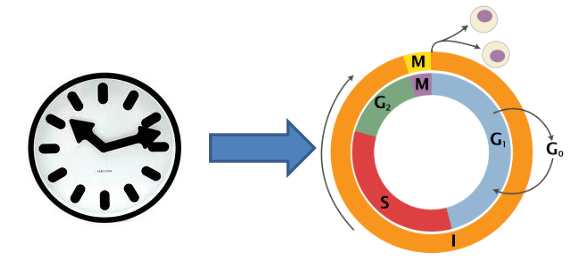

# Question 8) Couple the cell cycle and circadian clock by modifying the synthesis reaction of Wee1 

# Question 9) Observe the different behaviors that can be obtained when changing the circadian period

# Question 10) Using Events simulate a jet lag when going to the East
* Observe the different behaviors of the cell


# Question 11) Simulate a jet lag when going to the West
* Is it symmetrical ?
* Interpret the result

# Part V: Cancer Chronotherapies
* Cancer cells have an uncontrolled cell cycle
* in particular the control by the circadian clock is lost
* in proliferative tissues (skin, gut, colon, liver, ...) safe cell divisions are synchronized by the circadian clock 
#### The rational of cancer chronotherapies is to expose the tumor to cytotoxic drugs at times when they are non toxic for the (safe)  synchronized  cells
* the irinotecan is a cytotoxic drug that destroys DNA when the cell is in S phase (i.e. during replication of DNA)

# Question 12) Add reactions for irinotecan
* hypothesize irinotecan degradation rate 
* simulate DNA damage by the stopping of synthesis reactions using Biocham events when the concentration of irinotecan is above some threshold


# Question 13) Determine and optimize the exposure law for irinotecan chronotherapies 